## Decision Tree Model

This is a medical research dataset. 
Taget field : medication treatment for each patient: Drug A, Drug B, Drug c, Drug x and y.
Features: Age, Sex, Blood Pressure, and Cholesterol of patients
My aim is to build a decision tree classifier to predict what treatment we should give to a unknow patient

#### Get the data

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv')
df.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC


In [6]:
print(df.shape,'\n',df.Drug.value_counts())

(200, 6) 
 drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


In [32]:
df.Drug.value_counts().values

array([91, 54, 23, 16, 16], dtype=int64)

#### Analysis

In [11]:
df.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

In [15]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,drugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
Age            200 non-null int64
Sex            200 non-null object
BP             200 non-null object
Cholesterol    200 non-null object
Na_to_K        200 non-null float64
Drug           200 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [37]:
for col in df.select_dtypes(include=['object']).columns:
    print(col,'\n',df[col].value_counts())

Sex 
 M    104
F     96
Name: Sex, dtype: int64
BP 
 HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
Cholesterol 
 HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64
Drug 
 drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


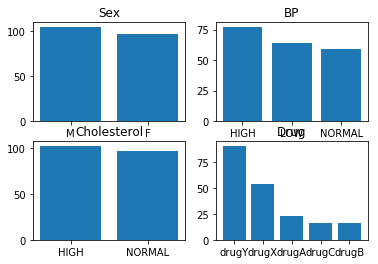

In [34]:
for i, col in enumerate(df.select_dtypes(include=['object']).columns):
    ax=plt.subplot(2,2,i+1)
    ax.bar(df[col].value_counts().index,df[col].value_counts().values)
    ax.set_title(col)

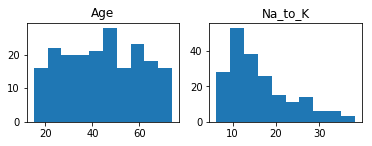

In [39]:
for i, col in enumerate(df.select_dtypes(exclude=['object']).columns):
    ax=plt.subplot(2,2,i+1)
    ax.hist(df[col])
    ax.set_title(col)

#### Model

**Convert categorical data to dummy**

In [51]:
len=df.shape[1]-1
x=df[list(df.columns[0:len])]
X=pd.get_dummies(x,prefix_sep='_', drop_first=True)
X.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,0
2,47,10.114,1,1,0,0
3,28,7.798,0,0,1,0
4,61,18.043,0,1,0,0


In [55]:
X_np=X.values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_np,df['Drug'].values,test_size=0.2,random_state=123)
print('Xtrain:',x_train.shape,'\nXtest:',x_test.shape)
print('\nytrain:',y_train.shape,'\nytest:',y_test.shape)

Xtrain: (160, 6) 
Xtest: (40, 6)

ytrain: (160,) 
ytest: (40,)


In [61]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=4).fit(x_train,y_train)

In [62]:
yhat=model.predict(x_test)
print(y_test[0:10])
print(yhat[0:10])

['drugY' 'drugX' 'drugX' 'drugC' 'drugY' 'drugY' 'drugY' 'drugY' 'drugX'
 'drugC']
['drugY' 'drugX' 'drugX' 'drugC' 'drugY' 'drugY' 'drugY' 'drugY' 'drugX'
 'drugC']


#### Evaluation

In [64]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat))

DecisionTrees's Accuracy:  1.0


In [65]:
metrics.confusion_matrix(y_test, yhat)

array([[ 2,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  9,  0],
       [ 0,  0,  0,  0, 23]], dtype=int64)

In [66]:
metrics.accuracy_score(y_train,model.predict(x_train))

1.0

**Accuracy is 100%**

In [71]:
!conda install -c conda-forge pydotplus -y

Solving environment: ...working... done

# All requested packages already installed.



WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.


In [68]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

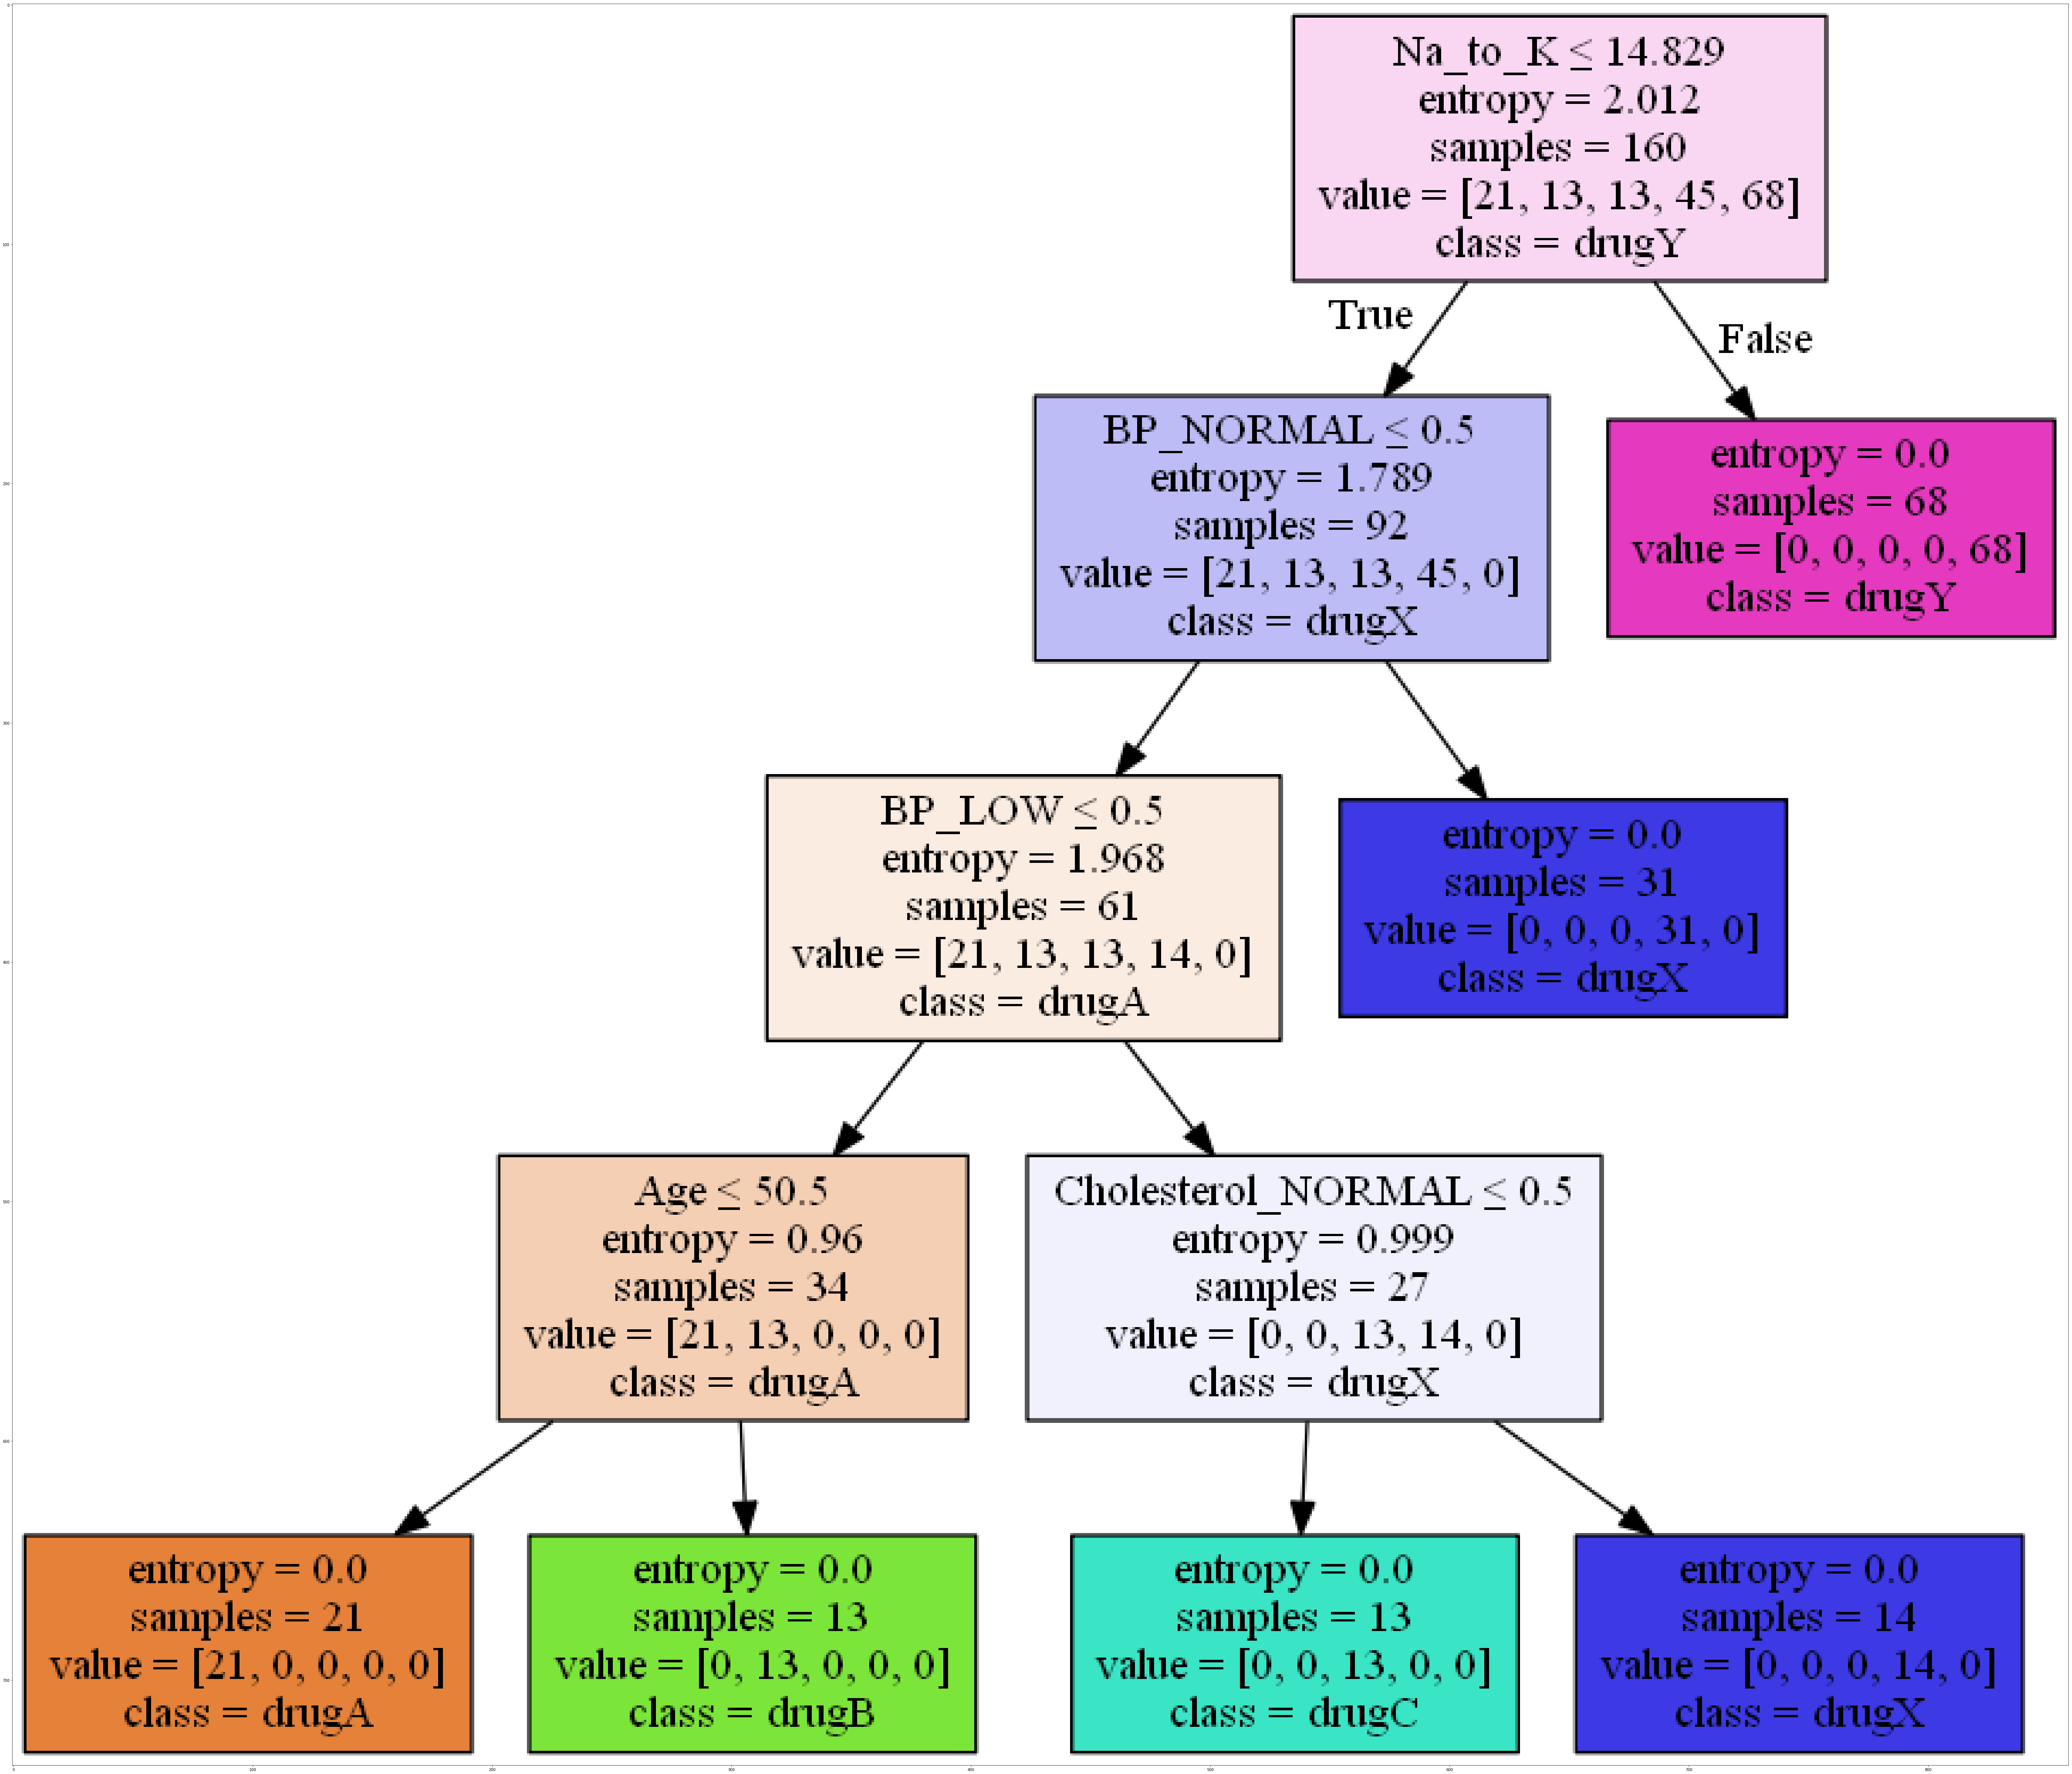

In [70]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = X.columns
targetNames = df["Drug"].unique().tolist()
out=tree.export_graphviz(model,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')